/var/folders/8p/dwqnp65s0s77jdbm4_6z4vp80000gn/T/ipykernel_15539/340630829.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercepts.append(model.params[0])
/var/folders/8p/dwqnp65s0s77jdbm4_6z4vp80000gn/T/ipykernel_15539/340630829.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slopes.append(model.params[1])
/var/folders/8p/dwqnp65s0s77jdbm4_6z4vp80000gn/T/ipykernel_15539/340630829.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

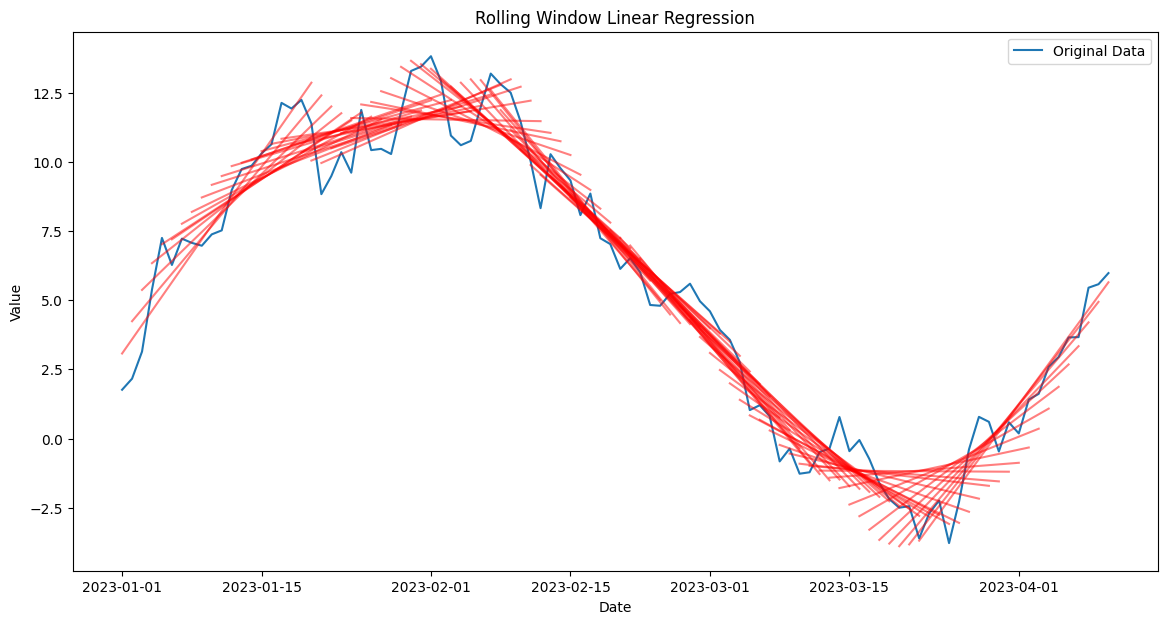

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Example time series data
np.random.seed(0)
dates = pd.date_range('2023-01-01', periods=100)
data = pd.Series(np.random.randn(100).cumsum(), index=dates)

# Parameters
window_size = 20

# Function to calculate rolling window linear regression
def rolling_linreg(series, window):
    intercepts = []
    slopes = []
    for i in range(len(series) - window + 1):
        y = series[i:i + window]
        x = np.arange(window)
        x = sm.add_constant(x)
        model = sm.OLS(y, x).fit()
        intercepts.append(model.params[0])
        slopes.append(model.params[1])
    return intercepts, slopes

# Calculate rolling linear regression parameters
intercepts, slopes = rolling_linreg(data, window_size)

# Create a DataFrame for plotting
rolling_dates = dates[window_size - 1:]
rolling_intercepts = pd.Series(intercepts, index=rolling_dates)
rolling_slopes = pd.Series(slopes, index=rolling_dates)

# Plot the original data and the rolling linear regression
plt.figure(figsize=(14, 7))
plt.plot(data, label='Original Data')
for i in range(len(rolling_intercepts)):
    start_date = rolling_dates[i] - pd.DateOffset(days=window_size-1)
    end_date = rolling_dates[i]
    plt.plot([start_date, end_date],
             [rolling_intercepts[i], rolling_intercepts[i] + rolling_slopes[i] * (window_size - 1)],
             color='red', alpha=0.5)

plt.legend()
plt.title('Rolling Window Linear Regression')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()
